In [ ]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

In [ ]:
#Feature extraction is to transform image into list of features using grid technique 
def feature_extraction(x_path,y_path):
  x_array=[] # 2d list to store features of each image
  y_array=[]# list to keep y labels
  trainlabel_file=open(y_path,"r")
  for line in trainlabel_file:
      y_array.append(int(line.rstrip()))
  xfile=open(x_path,"r")
  num_lines=0
  xfile_list=[]
  for line in xfile:
    num_lines=num_lines+1
    xfile_list.append(line)
  
  for i in range(0,num_lines,28):
      xi_feature=[]
      row_count=i
      for j in range(7): # Taking 4x4 grids
          ind_col_count=0
          white_count=0
          col=0
          while(col<7):
              white_count=0
              old_colcount=ind_col_count
              for k in range(row_count,row_count+4):
                  ind_col_count=old_colcount
                  for l in range (old_colcount,old_colcount+4):
                      if(xfile_list[k][l]==' '):
                          ind_col_count=ind_col_count+1
                          white_count=white_count+1 # Taking white pixels percentage
                      else:
                          ind_col_count=ind_col_count+1
              xi_feature.append(round((white_count/16)*10))
              col=col+1
          row_count=row_count+4
      x_array.append(xi_feature)
  return x_array,y_array
                    


In [ ]:
X_features,Y_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/digitdata/trainingimages","/Users/rohithgummadi/Desktop/AI_Project/digitdata/traininglabels")

In [ ]:
print(len(X_features))

5000


In [ ]:
# To calculate prior probabilities of output feature classes based on training data
def calc_class_prior(Ytrain_labels):
   class_priors={}
   uni_Ytrain_labels=[]
   Ytrain_labels_size=len(Ytrain_labels)
   for i in Ytrain_labels:
      if i not in uni_Ytrain_labels:
         uni_Ytrain_labels.append(i)
   for outcome in uni_Ytrain_labels:
      outcome_count=0
      for j in Ytrain_labels:
         if(j==outcome):
            outcome_count=outcome_count+1
      class_priors[outcome]=outcome_count/Ytrain_labels_size
   return class_priors
    
    

In [ ]:
class_priors=calc_class_prior(Y_labels)
print(class_priors.items())

dict_items([(5, 0.0868), (0, 0.0958), (4, 0.107), (1, 0.1126), (9, 0.099), (2, 0.0976), (3, 0.0986), (6, 0.1002), (7, 0.11), (8, 0.0924)])


In [ ]:
class_priors[0]

0.0958

In [ ]:
for i in range(len(X_features)):
    print(X_features[i])

[10, 10, 10, 10, 10, 10, 10, 10, 9, 5, 5, 2, 3, 10, 10, 10, 4, 4, 8, 10, 10, 10, 10, 10, 2, 5, 10, 10, 10, 10, 10, 6, 1, 9, 10, 10, 7, 1, 2, 8, 10, 10, 10, 8, 8, 10, 10, 10, 10]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4, 0, 8, 10, 10, 10, 4, 2, 4, 4, 10, 10, 8, 3, 9, 10, 2, 10, 10, 5, 7, 9, 4, 8, 10, 10, 6, 0, 2, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[10, 10, 10, 10, 10, 10, 10, 10, 8, 10, 10, 10, 4, 10, 9, 5, 10, 10, 7, 5, 10, 8, 4, 6, 5, 2, 8, 10, 10, 8, 8, 10, 2, 10, 10, 10, 10, 10, 10, 2, 10, 10, 10, 10, 10, 10, 8, 10, 10]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 6, 10, 10, 10, 10, 8, 1, 9, 10, 10, 10, 9, 1, 8, 10, 10, 10, 10, 6, 3, 10, 10, 10, 10, 10, 1, 8, 10, 10, 10, 10, 10, 8, 10, 10, 10, 10]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 8, 9, 10, 10, 10, 4, 5, 1, 8, 10, 10, 7, 2, 2, 5, 10, 10, 10, 9, 8, 2, 8, 10, 10, 10, 10, 10, 3, 8, 10, 10, 10, 10, 10, 8, 6, 10, 10]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 6, 3, 9, 10, 10, 10, 3, 2, 2, 8, 10, 10, 10, 8, 3, 1, 9, 10, 10

In [ ]:
# Fit function to precompute the likelihoods of all input features with respective to output class labels 
def fit(Xtrain_features,Ytrain_labels):
  threed_featurelist=[] # Grouping images based on their classes
  for i in range (0,10):
      twod_list=[]
      indices_list=[]
      for k in range(len(Ytrain_labels)):
          if(Ytrain_labels[k]==i):
              indices_list.append(k)
      for ind in indices_list:
          twod_list.append(Xtrain_features[ind])
      threed_featurelist.append(twod_list)
  threed_feature_len=len(threed_featurelist)
  threed_problist=[] #3d list to store likelihoods

  for i in range(threed_feature_len):
    twod_problist=[]
    for k in range(49): # Taking 4x4 grids
      ilen=len(threed_featurelist[i])
      array=np.full(11,0.00001)
      for j in range(ilen):
          count=0
          prob=0
          num=threed_featurelist[i][j][k]
          for p in range(ilen):
              if(num==threed_featurelist[i][p][k]):  
                  count=count+1
          prob=float(count/ilen)
          array[num]=prob
      array_tolist=list(array)
      twod_problist.append(array_tolist)
    threed_problist.append(np.transpose(twod_problist))
  return threed_featurelist, threed_problist


In [ ]:
threed_featurelist, threed_problist=fit(X_features,Y_labels)

In [ ]:
print(threed_problist[0])

[[1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 2.08768267e-03 9.81210856e-02 1.02296451e-01
  8.35073069e-03 1.00000000e-05 1.00000000e-05 1.00000000e-05
  5.84551148e-02 1.27348643e-01 8.14196242e-02 6.26304802e-02
  1.00000000e-05 1.00000000e-05 1.25260960e-02 8.76826722e-02
  2.08768267e-03 6.26304802e-03 1.27348643e-01 1.00000000e-05
  1.00000000e-05 5.42797495e-02 4.38413361e-02 1.00000000e-05
  3.75782881e-02 2.08768267e-02 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.94154489e-01 1.85803758e-01 1.25260960e-02
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05]
 [1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 2.08768267e-02 1.29436326e-01 2.00417537e-01
  2.29645094e-02 1.00000000e-05 1.00000000e-05 1.000

In [ ]:
print(len(threed_featurelist[9]))

495


In [ ]:
print(len(threed_problist))

10


In [ ]:
print(len(threed_problist[0]))
print(len(threed_problist[0][0]))

11
49


In [ ]:
Xvalidation_features,Yvalidation_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/digitdata/validationimages","/Users/rohithgummadi/Desktop/AI_Project/digitdata/validationlabels")


In [ ]:
Xtest_features,Ytest_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/digitdata/testimages","/Users/rohithgummadi/Desktop/AI_Project/digitdata/testlabels")


In [ ]:
print(Xtest_features)

[[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 8, 10, 10, 10, 10, 9, 2, 0, 10, 10, 10, 10, 8, 0, 1, 10, 10, 10, 10, 10, 4, 5, 10, 10, 10, 10, 6, 4, 10, 10, 10, 10, 10, 4, 10, 10, 10, 10], [10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 2, 3, 10, 10, 10, 10, 4, 5, 4, 9, 10, 10, 10, 2, 10, 5, 6, 10, 10, 10, 2, 9, 4, 8, 10, 10, 10, 5, 0, 2, 9, 10, 10, 10, 10, 10, 10, 10, 10], [10, 10, 10, 10, 10, 10, 10, 10, 10, 6, 1, 1, 7, 10, 10, 10, 10, 9, 2, 7, 10, 10, 10, 10, 3, 4, 10, 10, 10, 10, 4, 2, 8, 10, 10, 10, 8, 1, 2, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10], [10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 2, 2, 7, 10, 10, 10, 2, 2, 3, 8, 10, 10, 10, 5, 0, 1, 9, 10, 10, 7, 8, 9, 4, 5, 10, 10, 7, 1, 1, 1, 8, 10, 10, 10, 9, 8, 8, 10, 10], [10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 6, 10, 10, 10, 10, 10, 9, 2, 10, 10, 10, 10, 10, 10, 0, 10, 10, 10, 10, 10, 10, 2, 8, 10, 10, 10, 10, 10, 4, 6, 10, 10, 10, 10, 10, 9, 9, 10, 10], [10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 6, 7, 10, 10, 10, 10, 4, 5, 2, 10, 10, 10, 10, 4, 4,

In [ ]:
print(len(Xtest_features))

1000


In [ ]:
print(len(Xtest_features[0]))

49


In [ ]:
#Testing function to predict output classes for testing or validation data
def testing(Xtest_features, Xtrain_features,Ytrain_labels):
  class_priors=calc_class_prior(Ytrain_labels)
  threed_featurelist, threed_problist=fit(Xtrain_features,Ytrain_labels)
  test_validation_labels=[]
  for i in range(len(Xtest_features)):
    max=0
    max_ind=0
    prob_list=[]
    for d in range(10):
      prob=1
      for j in range(len(Xtest_features[i])):
        num=Xtest_features[i][j]
        prob=prob*threed_problist[d][num][j] # probability calculation
      prob=prob*class_priors[d]
      prob_list.append(prob)
    for l in range(len(prob_list)):
      if(prob_list[l]>=max):
        max=prob_list[l]
        max_ind=l
    test_validation_labels.append(max_ind)
  return test_validation_labels




In [ ]:
validation_completion_labels=testing(Xvalidation_features,X_features,Y_labels)

In [ ]:
acc_count=0
for i in range(len(validation_completion_labels)):
  if(validation_completion_labels[i]==Yvalidation_labels[i]):
    acc_count+=1
print("Accuracy for Validation data",(acc_count/len(Xvalidation_features))*100)

Accuracy for Validation data 78.8


In [ ]:
test_completion_labels=testing(Xtest_features,X_features,Y_labels)

In [ ]:
print(test_completion_labels)
print(len(test_completion_labels))

[7, 0, 2, 3, 1, 9, 7, 8, 1, 0, 4, 1, 9, 9, 5, 9, 2, 2, 8, 1, 3, 7, 9, 4, 8, 1, 8, 1, 0, 8, 1, 2, 5, 8, 0, 6, 2, 1, 1, 4, 1, 5, 3, 4, 6, 9, 3, 0, 9, 2, 2, 4, 9, 2, 1, 9, 2, 4, 9, 4, 4, 0, 9, 9, 2, 2, 3, 3, 1, 3, 5, 7, 3, 5, 8, 1, 2, 4, 4, 6, 4, 9, 5, 1, 0, 6, 9, 5, 7, 6, 9, 7, 1, 8, 0, 3, 7, 1, 3, 6, 7, 2, 5, 9, 7, 9, 6, 0, 6, 3, 7, 4, 6, 5, 8, 9, 9, 7, 8, 5, 8, 6, 7, 6, 9, 9, 7, 9, 7, 1, 9, 5, 2, 9, 3, 5, 1, 1, 2, 1, 4, 7, 9, 8, 3, 4, 3, 4, 0, 8, 3, 1, 7, 5, 0, 2, 7, 9, 4, 9, 4, 6, 6, 4, 7, 9, 3, 4, 5, 9, 5, 7, 3, 9, 2, 7, 5, 2, 5, 1, 1, 1, 8, 9, 2, 4, 7, 2, 0, 1, 5, 4, 9, 1, 9, 0, 6, 6, 4, 6, 5, 1, 8, 0, 7, 3, 8, 2, 7, 5, 2, 1, 8, 1, 1, 5, 9, 1, 0, 8, 0, 9, 4, 0, 6, 8, 2, 2, 3, 8, 4, 0, 8, 6, 5, 3, 1, 2, 1, 3, 1, 7, 9, 6, 7, 2, 0, 0, 6, 8, 1, 2, 3, 4, 1, 9, 3, 1, 5, 8, 1, 0, 2, 4, 9, 3, 6, 9, 8, 6, 9, 0, 4, 8, 9, 4, 7, 9, 3, 4, 1, 5, 4, 2, 3, 5, 8, 8, 8, 9, 3, 3, 6, 6, 0, 1, 6, 0, 3, 7, 4, 4, 1, 2, 9, 1, 4, 6, 9, 9, 7, 9, 8, 4, 4, 3, 1, 9, 1, 3, 1, 7, 9, 4, 8, 8, 8, 4, 7, 1, 9, 3, 6, 

In [ ]:
acc_count=0
for i in range(len(test_completion_labels)):
  if(test_completion_labels[i]==Ytest_labels[i]):
    acc_count+=1
print("Accuracy for test data is",(acc_count/len(Xtest_features))*100)

Accuracy for test data is 75.7


In [ ]:
#Training samples function to calculate accuracy for different sample sizes 
def training_samples():
  percent_train=[10,20,30,40,50,60,70,80,90,100] # different training samples
  accuracy_list=[]
  for ind in percent_train:
    data_points=int((ind/100)*len(X_features))
    indices_list=random.sample(range(0,len(X_features)),data_points)
    Xtrain_features=[]
    Ytrain_labels=[]
    for index in indices_list:
      Xtrain_features.append(X_features[index])
      Ytrain_labels.append(Y_labels[index])
    
    test_completion_output=[]
    test_completion_output=testing(Xtest_features, Xtrain_features,Ytrain_labels)
    acc_count=0
    for i in range(len(test_completion_output)):
      if(test_completion_output[i]==Ytest_labels[i]):
        acc_count+=1
    accuracy=(acc_count/len(Xtest_features))*100
    print("Accuracy for",ind,"% data is",accuracy)
    accuracy_list.append(accuracy)
  


In [ ]:
training_samples()

Accuracy for 10 % data is 66.8
Accuracy for 20 % data is 71.3
Accuracy for 30 % data is 74.7
Accuracy for 40 % data is 73.3
Accuracy for 50 % data is 75.2
Accuracy for 60 % data is 74.8
Accuracy for 70 % data is 75.4
Accuracy for 80 % data is 74.8
Accuracy for 90 % data is 74.6
Accuracy for 100 % data is 75.7


In [ ]:
#cal_m_std function is to calculate mean and standard deviation of different sample sizes accuracies
percent_train=[10,20,30,40,50,60,70,80,90,100]
mean_list=[]
std_list=[]
time_list=[]
def calc_m_std():
  for ind in percent_train:
    accuracy_list=[]
    percent_timelist=[]
    for i in range(5):
      data_points=int((ind/100)*len(X_features))
      indices_list=random.sample(range(0,len(X_features)),data_points)
      Xtrain_features=[]
      Ytrain_labels=[]
      for index in indices_list:
        Xtrain_features.append(X_features[index])
        Ytrain_labels.append(Y_labels[index])
      
      test_completion_output=[]
      start=time.time()
      test_completion_output=testing(Xtest_features, Xtrain_features,Ytrain_labels)
      end=time.time()
      percent_timelist.append((end-start)*10**3)
      acc_count=0
      for i in range(len(test_completion_output)):
        if(test_completion_output[i]==Ytest_labels[i]):
          acc_count+=1
      accuracy=(acc_count/len(Xtest_features))*100
      accuracy_list.append(accuracy)
    time_list.append(np.average(percent_timelist))
    mean_list.append(np.average(accuracy_list))
    std_list.append(np.std(accuracy_list))
    print("Time taken for",ind,"% data is", percent_timelist)
    print("mean time for",ind,"% data is ",np.average(percent_timelist))
    print("accuracy_list for",ind,"% data is", accuracy_list) 
    print("mean accuracies for",ind,"% data is ",np.average(accuracy_list))# Mean of accuracies of sample data
    print("standard deviation of accuracies for",ind,"% data is",np.std(accuracy_list)) #Standard deviation of accuracies of sample data
    print("\n")
    


In [ ]:
calc_m_std()

Time taken for 10 % data is [419.76261138916016, 420.12572288513184, 395.62225341796875, 401.8564224243164, 390.37394523620605]
mean time for 10 % data is  405.54819107055664
accuracy_list for 10 % data is [66.10000000000001, 63.800000000000004, 67.4, 63.2, 65.60000000000001]
mean accuracies for 10 % data is  65.22
standard deviation of accuracies for 10 % data is 1.53414471286121


Time taken for 20 % data is [953.3977508544922, 887.845516204834, 923.9652156829834, 947.2634792327881, 912.9443168640137]
mean time for 20 % data is  925.0832557678223
accuracy_list for 20 % data is [71.89999999999999, 70.6, 70.89999999999999, 71.7, 69.6]
mean accuracies for 20 % data is  70.93999999999998
standard deviation of accuracies for 20 % data is 0.8260750571225363


Time taken for 30 % data is [1794.586420059204, 1749.976396560669, 1789.2215251922607, 1755.824327468872, 1778.6519527435303]
mean time for 30 % data is  1773.6521244049072
accuracy_list for 30 % data is [73.1, 73.1, 72.3, 72.8, 72.7]

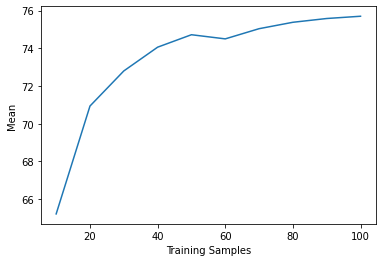

In [ ]:
plt.plot(percent_train,mean_list)
plt.xlabel("Training Samples")
plt.ylabel("Mean")
plt.show()

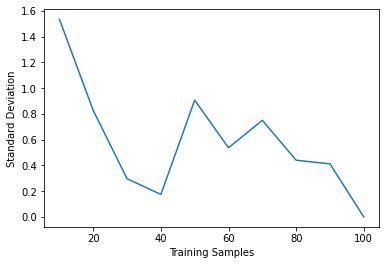

In [ ]:
plt.plot(percent_train,std_list)
plt.xlabel("Training Samples")
plt.ylabel("Standard Deviation")
plt.show()

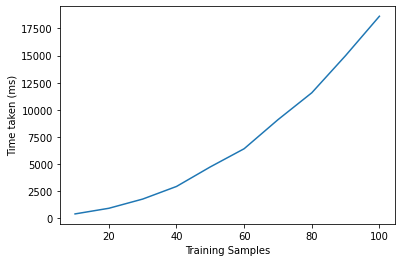

In [ ]:
plt.plot(percent_train,time_list)
plt.xlabel("Training Samples")
plt.ylabel("Time taken (ms)")
plt.show()